# Depression Classification from texts using LSTM

Utilizing Long Short-Term Memory (LSTM) networks for binary text classification, we are addressing a dataset containing written dialogues, messages, and posts. Each individual message or utterance within these dialogues is associated with one of two labels: "depressed" or "not depressed."

## Workflow:
1. Import Data
2. Data Preprocessing
3. LSTM Model Building
4. Training and Validation
5. Model Evalutaion and Testing
6. Saving The Model

**Use google colab for a free GPU**

# Connecting to Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd  # For data manipulation and analysis using data frames.
import numpy as np  # For numerical computations and array handling.
import re  # For regular expression operations, often used in text processing.
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets.
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # For model evaluation.
from keras.models import Sequential  # Imports the Sequential model from Keras.
from keras.layers import Embedding, LSTM, Dense, Dropout  # Imports specific layers from Keras.
import matplotlib.pyplot as plt  # For creating plots and visualizations.
from tensorflow.keras.utils import Sequence  # Helps with creating custom data loading pipelines.
import math

from sklearn.preprocessing import LabelEncoder  # For label encoding categorical target variables.
import nltk  # The Natural Language Toolkit for various NLP tasks.
nltk.download('punkt')  # downloads the Punkt tokenizer models used for tokenization in Natural Language Toolkit (NLTK).
from nltk.corpus import stopwords  # Stopwords are common words often removed in NLP tasks.
from tensorflow.keras.preprocessing.text import Tokenizer  # For converting text to tokens (words or subwords).
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences to a fixed length.
!pip install autocorrect  # Installs the 'autocorrect' package for spelling correction.
from autocorrect import Speller  # Imports the Speller class for spelling correction.
!pip install unidecode  # Installs the 'unidecode' package for unicode string handling.
import unidecode  # Imports the 'unidecode' package for unicode string handling.
!pip install contractions  # Installs the 'contractions' package for expanding contractions.
import contractions  # Imports the 'contractions' package for expanding contractions.
from string import punctuation  # Imports the 'punctuation' constant from the 'string' module.
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('stopwords')  # Downloads the stopwords corpus in NLTK.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd  # For data manipulation and analysis using data frames.
import numpy as np  # For numerical computations and array handling.
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets.
from sklearn.preprocessing import LabelEncoder  # For label encoding categorical target variables.
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # For model evaluation.


from tensorflow.keras.models import Sequential  # A linear stack of layers for building neural network models.
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout  # Layers for neural networks.
from tensorflow.keras.utils import Sequence  # Helps with creating custom data loading pipelines.
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D  # Additional layers for neural networks.
from keras.models import Sequential  # Imports the Sequential model from Keras.
from keras.layers import Embedding, LSTM, Dense, Dropout  # Imports specific layers from Keras.

import math  # For mathematical operations.
import matplotlib.pyplot as plt  # For creating plots and visualizations.


import re  # For regular expression operations, often used in text processing.
import nltk  # The Natural Language Toolkit for various NLP tasks.
nltk.download('punkt')  # downloads the Punkt tokenizer models used for tokenization in Natural Language Toolkit (NLTK).
from nltk.corpus import stopwords  # Stopwords are common words often removed in NLP tasks.
from tensorflow.keras.preprocessing.text import Tokenizer  # For converting text to tokens (words or subwords).
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences to a fixed length.
!pip install autocorrect  # Installs the 'autocorrect' package for spelling correction.
from autocorrect import Speller  # Imports the Speller class for spelling correction.
!pip install unidecode  # Installs the 'unidecode' package for unicode string handling.sni
import unidecode  # Imports the 'unidecode' package for unicode string handling.
!pip install contractions  # Installs the 'contractions' package for expanding contractions.
import contractions  # Imports the 'contractions' package for expanding contractions.
from string import punctuation  # Imports the 'punctuation' constant from the 'string' module.
nltk.download('stopwords')  # Downloads the stopwords corpus in NLTK.



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Reading the Dataset

In [ ]:
# Load your depression dataset (replace 'dataset.csv' with your dataset file)
df = pd.read_csv('/content/drive/MyDrive/Depression Dataset/Depression_Detection.csv')


In [ ]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,depressed
1,3,Am I weird I don't get affected by compliments...,not depressed
2,4,Finally 2020 is almost over... So I can never ...,not depressed
3,8,i need helpjust help me im crying so hard,depressed
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",depressed


In [ ]:
df.shape

(232074, 3)

# Checking Null Values

In [ ]:
df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0
count,232074.000000
mean,174152.863518
std,100500.425362
min,2.000000
25%,87049.250000
50%,174358.500000
75%,261285.750000
max,348110.000000


In [ ]:
df.describe(include="all")

,Unnamed: 0,text,class
count,232074.000000,232074,232074
unique,NaN,232074,2
top,NaN,Ex Wife Threatening SuicideRecently I left my ...,depressed
freq,NaN,1,116037
mean,174152.863518,NaN,NaN
std,100500.425362,NaN,NaN
min,2.000000,NaN,NaN
25%,87049.250000,NaN,NaN
50%,174358.500000,NaN,NaN
75%,261285.750000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


# Visualizations

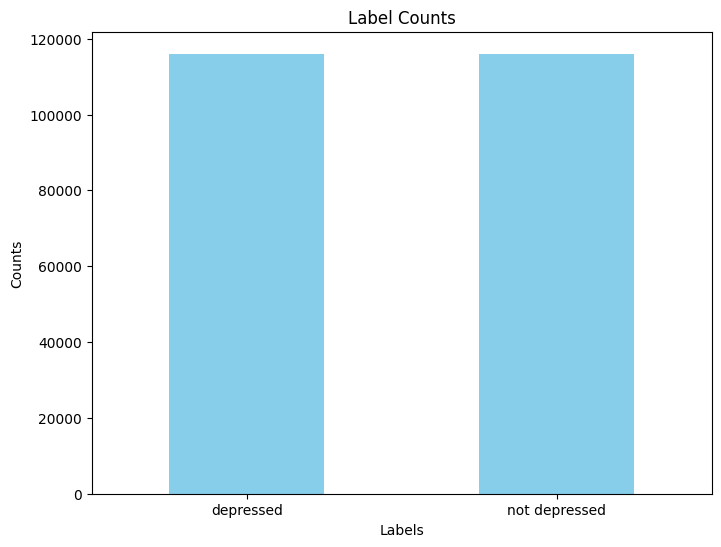

In [ ]:
label_counts=df["class"].value_counts()
plt.figure(figsize=(8,6))
label_counts.plot(kind='bar',color='skyblue')
plt.title("Label Counts")
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
# Tokenize and count words
word_freq_depressed = FreqDist()
word_freq_not_depressed = FreqDist()

for index, row in df.iterrows():
    words = word_tokenize(row['text'].lower())  # Tokenize and convert to lowercase
    if row['class'] == "depressed":
        word_freq_depressed.update(words)
    elif row['class'] == "not depressed":
        word_freq_not_depressed.update(words)

# Get the top 10 words by frequency
top_words_depressed = word_freq_depressed.most_common(10)
top_words_not_depressed = word_freq_not_depressed.most_common(10)

# Print the top 10 words and their frequencies
# for word, frequency in top_words_depressed:
#     print(f'{word}: {frequency}')


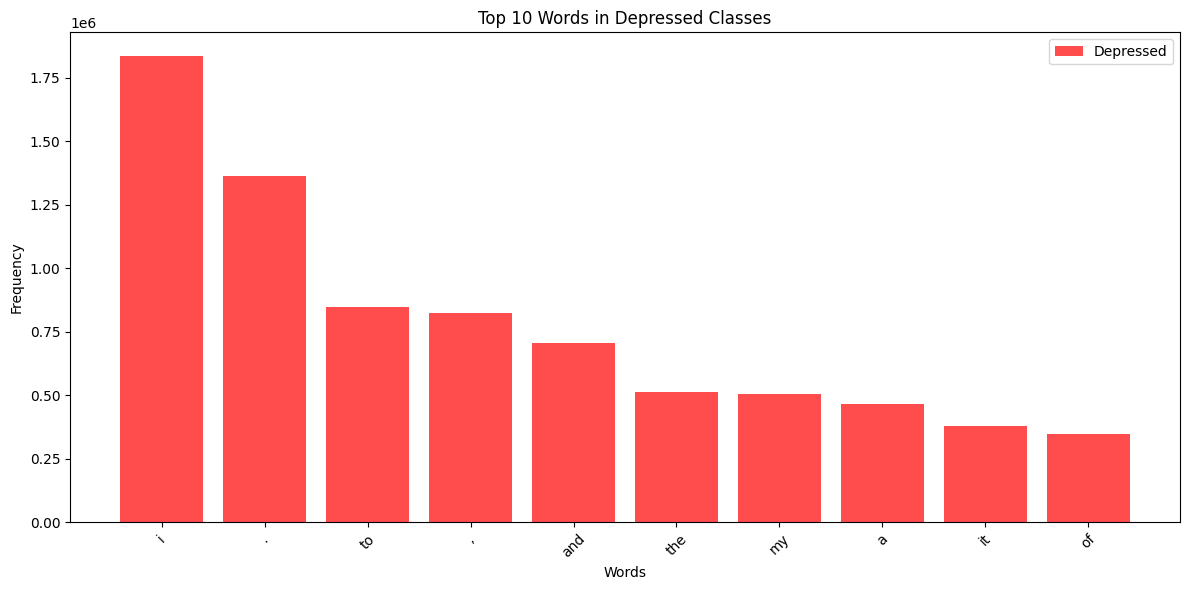

In [ ]:
# Plot word frequencies
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_words_depressed), label='Depressed', color='red', alpha=0.7)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Depressed Classes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

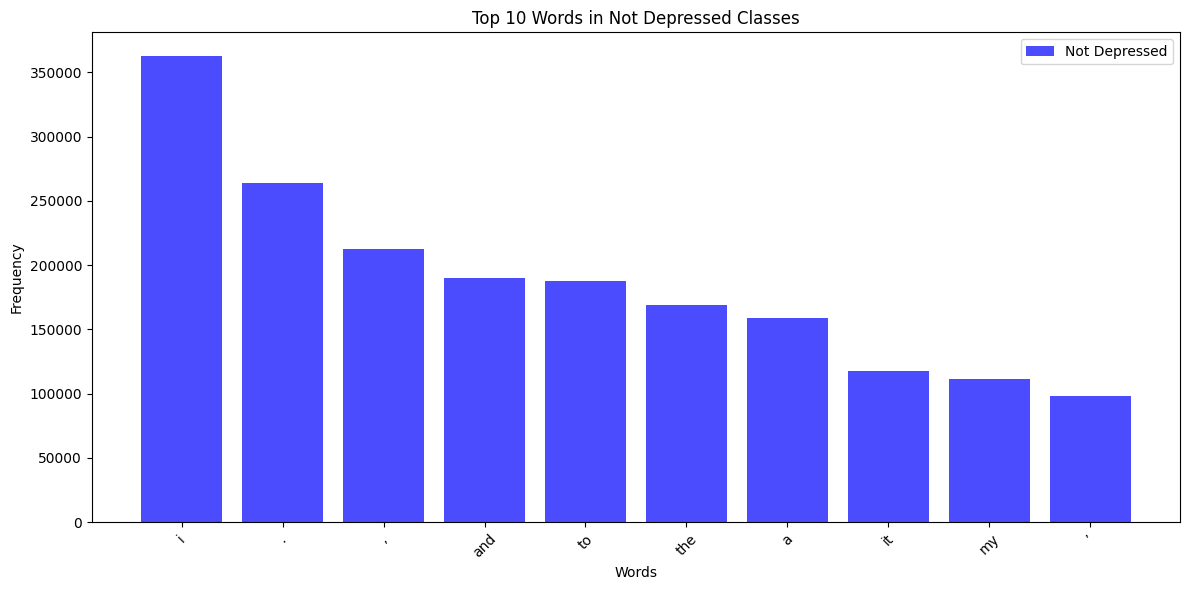

In [ ]:
# Plot word frequencies
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_words_not_depressed), label='Not Depressed', color='blue', alpha=0.7)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Not Depressed Classes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

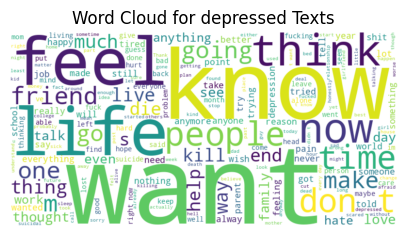

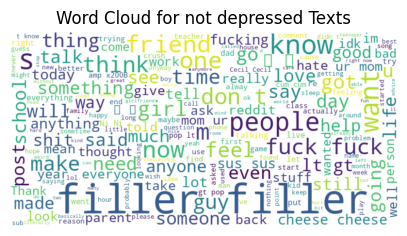

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Calculate the number of words in each text
df['Word Count'] = df['text'].apply(lambda x: len(x.split()))

# Word cloud for each emotion class
classes = df['class'].unique()
for emotion in classes:
    text_corpus = ' '.join(df[df['class'] == emotion]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {emotion} Texts')
    plt.show()




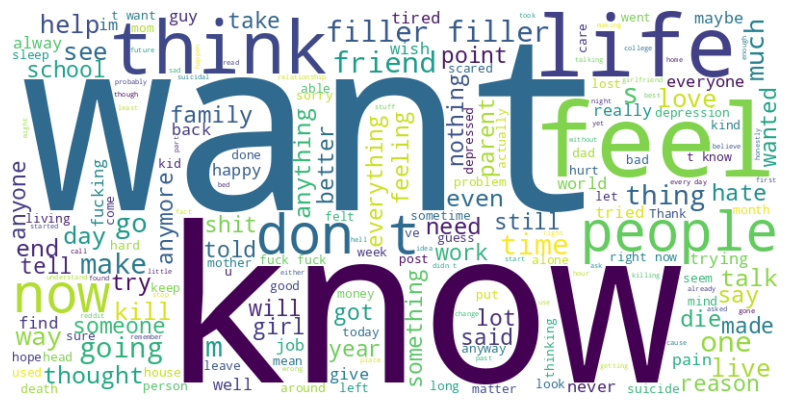

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud (replace with your data)
text = " ".join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


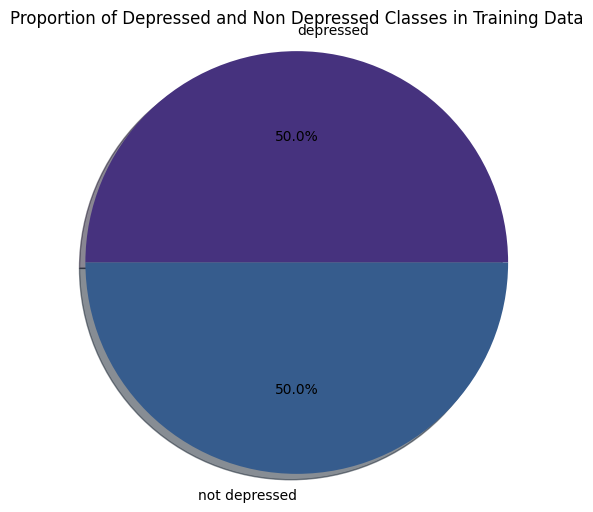

In [ ]:
# Create a pie chart
import seaborn as sns
labels_counts = df['class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(labels_counts, labels=labels_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), shadow=True)
plt.title('Proportion of Depressed and Non Depressed Classes in Training Data')
plt.axis('equal')
plt.show()


# Preprocessing The Data

**Importing Libraries**

In [ ]:
import nltk
nltk.download('punkt')
import re
!pip install autocorrect
from autocorrect import Speller
!pip install unidecode
import unidecode
!pip install contractions
import contractions
from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Preprocessing**

In [ ]:
# Text Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):


    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    html_pattern = r'<.*?>'
    text = re.sub(pattern=html_pattern, repl=' ', string=text)

    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(pattern=url_pattern, repl=' ', string=text)

    # numbers
    number_pattern = r'\d+'
    text = re.sub(pattern=number_pattern, repl=' ', string=text)

    # unidecode
    text = unidecode.unidecode(text)

    # Expanding Contractions
    text = contractions.fix(text)

    # remove punctutation
    text = text.translate(str.maketrans('', '', punctuation))

    # removing single characters
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    text = re.sub(pattern=single_char_pattern, repl=" ", string=text)

    # Extra spaces
    space_pattern = r'\s+'
    text = re.sub(pattern=space_pattern, repl=" ", string=text)

    # Tokenize and remove stopwords
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    # Join the words back into a single string
    text = ' '.join(words)

    return text

df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()

,Unnamed: 0,text,class,Word Count
0,2,ex wife threatening suiciderecently left wife ...,depressed,143
1,3,weird get affected compliments coming someone ...,not depressed,27
2,4,finally almost never hear bad year ever swear ...,not depressed,26
3,8,need helpjust help crying hard,depressed,9
4,9,losthello name adam struggling years afraid pa...,depressed,438


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
# Tokenize and count words
word_freq_depressed = FreqDist()
word_freq_not_depressed = FreqDist()

for index, row in df.iterrows():
    words = word_tokenize(row['text'].lower())  # Tokenize and convert to lowercase
    if row['class'] == "depressed":
        word_freq_depressed.update(words)
    elif row['class'] == "not depressed":
        word_freq_not_depressed.update(words)

# Get the top 10 words by frequency
top_words_depressed = word_freq_depressed.most_common(10)
top_words_not_depressed = word_freq_not_depressed.most_common(10)

# Print the top 10 words and their frequencies
# for word, frequency in top_words_depressed:
#     print(f'{word}: {frequency}')


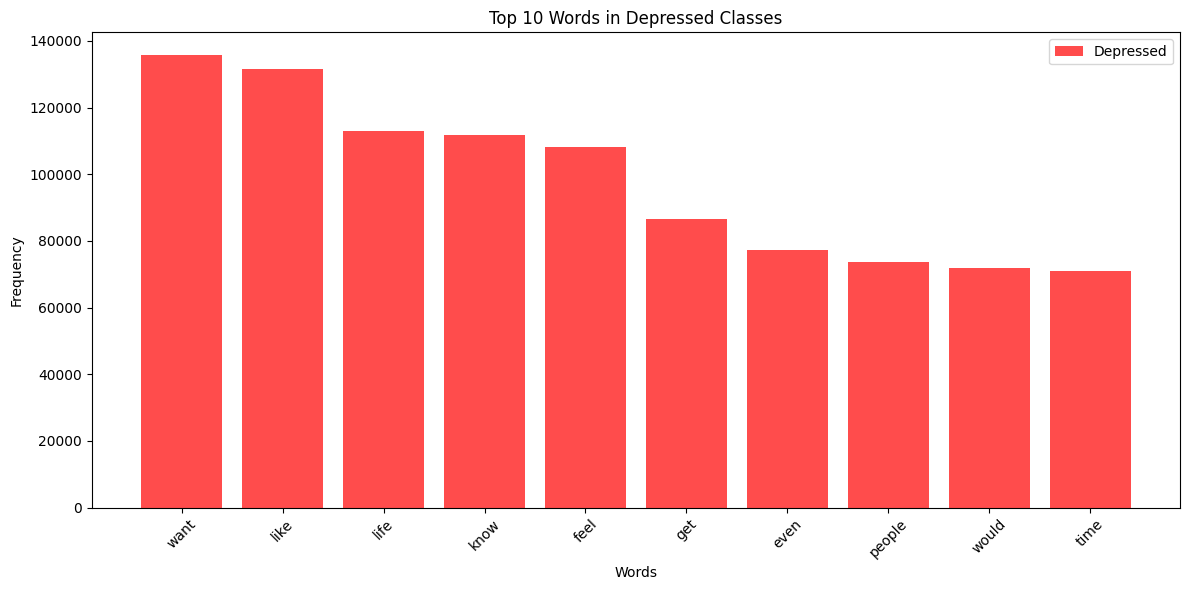

In [ ]:
# Plot word frequencies
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_words_depressed), label='Depressed', color='red', alpha=0.7)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Depressed Classes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

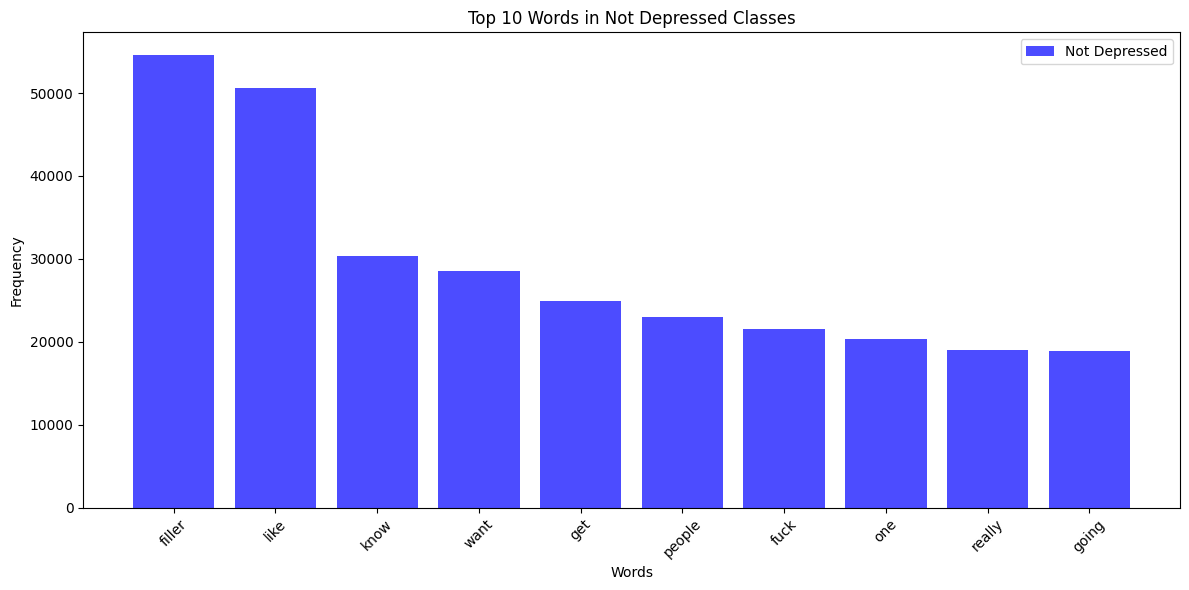

In [ ]:
# Plot word frequencies
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_words_not_depressed), label='Not Depressed', color='blue', alpha=0.7)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Not Depressed Classes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

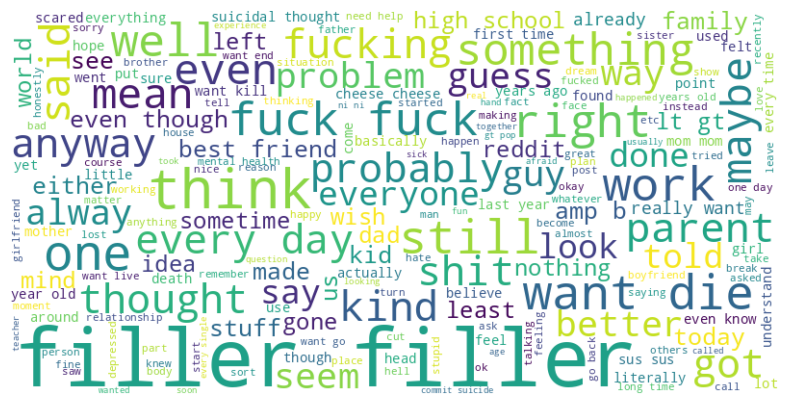

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud (replace with your data)
text = " ".join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


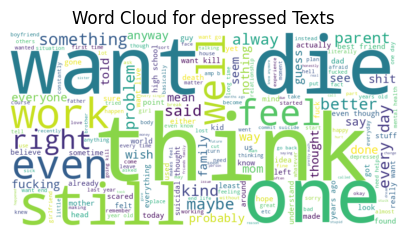

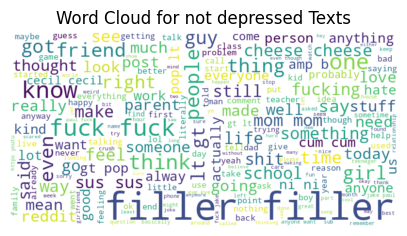

In [ ]:

# Calculate the number of words in each text
df['Word Count'] = df['text'].apply(lambda x: len(x.split()))

# Word cloud for each emotion class
classes = df['class'].unique()
for emotion in classes:
    text_corpus = ' '.join(df[df['class'] == emotion]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {emotion} Texts')
    plt.show()




In [ ]:
labels_counts = df['class'].value_counts()
print(labels_counts)
type(labels_counts)

depressed        116037
not depressed    116037
Name: class, dtype: int64


pandas.core.series.Series

In [ ]:
labels_counts.replace({0: 'depressed', 1: 'not depressed'}, inplace=True)
print(labels_counts)

depressed        116037
not depressed    116037
Name: class, dtype: int64


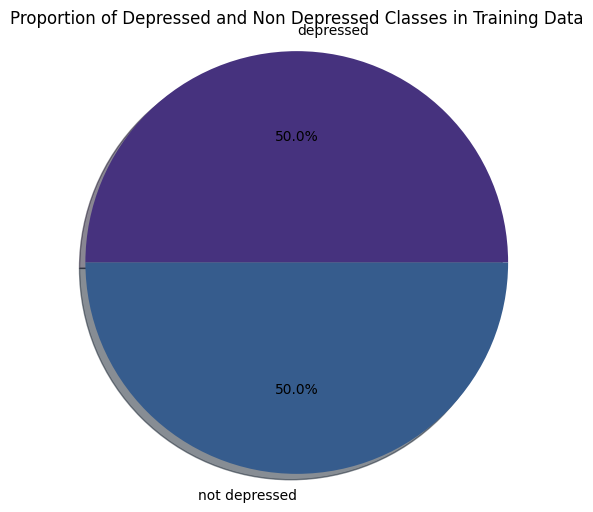

In [ ]:
# Create a pie chart
#
import seaborn as sns
labels_counts = df['class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(labels_counts, labels=labels_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), shadow=True)
plt.title('Proportion of Depressed and Non Depressed Classes in Training Data')
plt.axis('equal')
plt.show()


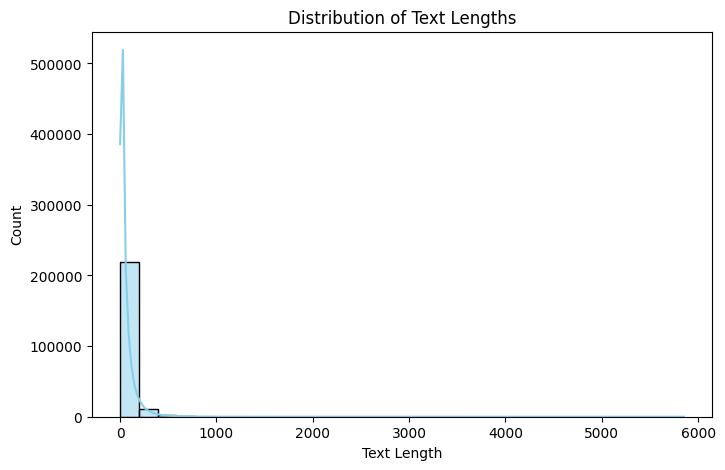

In [ ]:
# Calculate the lengths of each text in the training data
text_lengths = df['text'].apply(lambda x: len(x.split()))

# Create a histogram
plt.figure(figsize=(8, 5))
sns.histplot(text_lengths, bins=30, kde=True, color='skyblue')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Distribution of Text Lengths')
plt.show()


In [ ]:
# # Encoding the labels
label_encoder = LabelEncoder()  # Creates an instance of LabelEncoder.
df['class'] = label_encoder.fit_transform(df['class'])  # Encodes the 'class' column in the DataFrame using label encoding.


In [ ]:
df.head()

,Unnamed: 0,text,class,Word Count
0,2,ex wife threatening suiciderecently left wife ...,0,60
1,3,weird get affected compliments coming someone ...,1,13
2,4,finally almost never hear bad year ever swear ...,1,11
3,8,need helpjust help crying hard,0,5
4,9,losthello name adam struggling years afraid pa...,0,204


# Splitting The Dataset

In [ ]:
# Differentiating the input and output values
X = df['text']
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(y_train)
print(y_train.shape)

103752    0
208014    1
220765    0
116840    1
149067    1
         ..
119879    1
103694    1
131932    1
146867    1
121958    1
Name: class, Length: 185659, dtype: int64
(185659,)


In [ ]:
print(X_train)
print(X_train.shape)

103752    going kill sooni know know body mind completel...
208014    using sub diary day today great school stuff b...
220765    else supposed got serious problem years back b...
116840    hey yes need help get new subreddit ground sub...
149067    non trans gender dysphoria like menstruation e...
                                ...                        
119879    found combo steve minecraft forgot save vault ...
103694    much hate admit california texas quite similar...
131932                many people online horny mf time guys
146867    fuck chemistry man got study thing nothing wan...
121958    put reese wrapper ground pocket things like co...
Name: text, Length: 185659, dtype: object
(185659,)


# Tokenize and Padding

In [ ]:
# Tokenize and pad sequences
max_seq_length = 100  # Set desired maximum sequence length
tokenizer = Tokenizer(num_words=5000)  # Creates a tokenizer with a maximum of 5000 words.
tokenizer.fit_on_texts(X_train)  # Fits the tokenizer on the training data to build vocabulary.
X_train_sequences = tokenizer.texts_to_sequences(X_train)  # Converts training text to sequences using the tokenizer.
X_test_sequences = tokenizer.texts_to_sequences(X_test)  # Converts testing text to sequences using the tokenizer.


In [ ]:
X_train_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,   12,   53,
          3,    3,  244,  162,  252, 1169,   12,  497,   18,    8,  357,
       2213,   35,   30, 1430, 2170,   30,  546,  546,  342,  267,  546,
        876,  244,  357,   30,  115,   39,   29,  110,   52,   29,  110,
         52], dtype=int32)

In [ ]:
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_seq_length, padding='post', truncating='post')
# Pads and truncates training sequences to a maximum sequence length.
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_seq_length, padding='post', truncating='post')
# Pads and truncates testing sequences to a maximum sequence length.

In [ ]:
print(X_train_padded[0])
print(X_train_padded[0].shape)

[  12   53    3    3  244  162  252 1169   12  497   18    8  357 2213
   35   30 1430 2170   30  546  546  342  267  546  876  244  357   30
  115   39   29  110   52   29  110   52    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
(100,)


In [ ]:
X_train.shape

(185659,)

In [ ]:
len(X_train_sequences)

185659

##LSTM Model Creation

In [ ]:
# Define the maximum sequence length and vocabulary size
max_seq_length = 100
vocab_size = 5000

# Build the LSTM model with required layers
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_seq_length))  # Specifying the input layer
model.add(LSTM(128, return_sequences=True))  # LSTM layer with return_sequences=True for stacking
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(LSTM(64, return_sequences=True))   # Another LSTM layer with return_sequences=True
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(LSTM(64))  # LSTM layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(1, activation='sigmoid'))  # Adds a Dense layer with 1 unit and a sigmoid activation function to the model.

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 100, 128)          131584    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           49408     
                                                                 
 dropout_1 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4

# Batch Processing

In [ ]:
# Defining a custom data generator for training
class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        return pad_sequences(tokenizer.texts_to_sequences(batch_x), maxlen=max_seq_length, padding='post',
                             truncating='post'), np.array(batch_y)

# Create data generators
batch_size = 64  # Adjust as needed
train_data_generator = DataGenerator(X_train, y_train, batch_size) # Creating the train data generator
steps_per_epoch = len(X_train) // batch_size # Defining the steps per epoch


# Model fitting

In [ ]:
lstm=model.fit(train_data_generator, steps_per_epoch=steps_per_epoch, epochs=10, validation_data=(X_test_padded, y_test))

Epoch 1/10
2900/2900 [==============================] - 173s 56ms/step - loss: 0.4654 - accuracy: 0.7741 - val_loss: 0.2236 - val_accuracy: 0.9191
Epoch 2/10
2900/2900 [==============================] - 64s 22ms/step - loss: 0.2070 - accuracy: 0.9261 - val_loss: 0.1919 - val_accuracy: 0.9300
Epoch 3/10
2900/2900 [==============================] - 64s 22ms/step - loss: 0.1821 - accuracy: 0.9342 - val_loss: 0.1849 - val_accuracy: 0.9314
Epoch 4/10
2900/2900 [==============================] - 67s 23ms/step - loss: 0.1661 - accuracy: 0.9397 - val_loss: 0.1813 - val_accuracy: 0.9331
Epoch 5/10
2900/2900 [==============================] - 65s 22ms/step - loss: 0.1544 - accuracy: 0.9441 - val_loss: 0.1854 - val_accuracy: 0.9329
Epoch 6/10
2900/2900 [==============================] - 64s 22ms/step - loss: 0.1417 - accuracy: 0.9481 - val_loss: 0.1890 - val_accuracy: 0.9316
Epoch 7/10
2900/2900 [==============================] - 65s 22ms/step - loss: 0.1299 - accuracy: 0.9530 - val_loss: 0.1902 

In [ ]:
 print(X_test)

74414     know months self harm free urge gets stronger ...
149516    start becoming rich start company become affor...
12484     poem haiku game dev hi hello hello stop fuckin...
14043     honestly got idea anymore feels everyone fake ...
30673     ever cry like think unfair life cry cry ever s...
                                ...                        
7259      wish reason die like cancer illness instead he...
4207      want friend finally leavei want able die witho...
92900      guess got headpats cute girl yup one time ladies
17403     programming usually god good almost profession...
4230      hit thinking lot lately really get better moth...
Name: text, Length: 46415, dtype: object


In [ ]:
print(y_test)

74414     0
149516    1
12484     1
14043     0
30673     1
         ..
7259      0
4207      0
92900     1
17403     1
4230      0
Name: class, Length: 46415, dtype: int64


# Predictions

In [ ]:
y_pred = model.predict(X_test_padded)  # Predicts labels for the test data using the model.
y_pred_binary = np.round(y_pred)  # Rounds the predicted probabilities to obtain binary predictions.

accuracy = accuracy_score(y_test, y_pred_binary)  # Calculates accuracy based on the true and predicted labels.
report = classification_report(y_test, y_pred_binary)  # Generates a classification report.

print(f'Accuracy: {accuracy}')  # Prints the accuracy.
print(f'Classification Report:\n{report}')  # Prints the classification report.

1451/1451 [==============================] - 9s 6ms/step
Accuracy: 0.9253043197242271
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     23128
           1       0.93      0.92      0.93     23287

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415



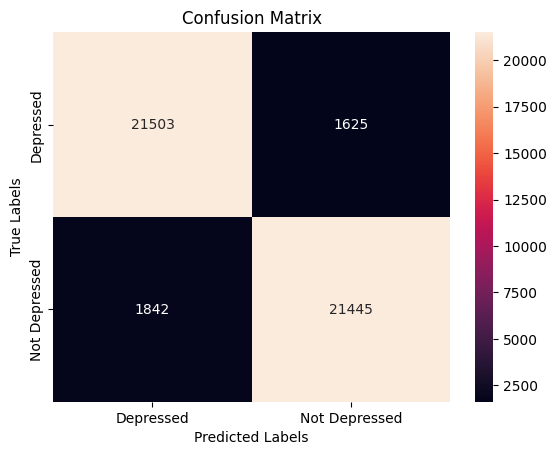

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_binary) # Create a confusion matrix
class_labels = ["Depressed", "Not Depressed"] #define clss labels
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')  # Label for the x-axis
plt.ylabel('True Labels')       # Label for the y-axis
plt.title('Confusion Matrix')    # Title for the plot
plt.show()


In [ ]:
print(y_pred_binary)

[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


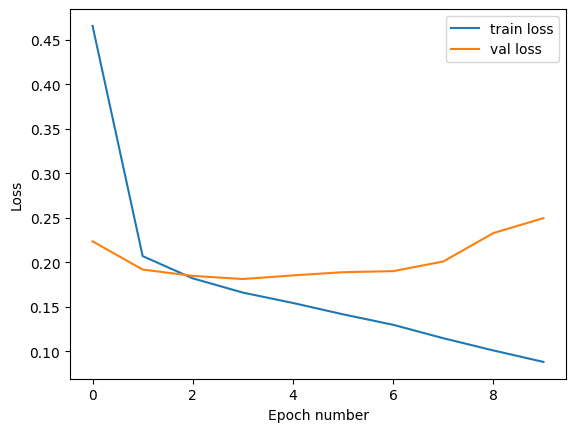

In [ ]:
plt.plot(lstm.history['loss'], label='train loss') # Plot training loss over epochs
plt.plot(lstm.history['val_loss'], label='val loss') # Plot validation loss over epochs
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

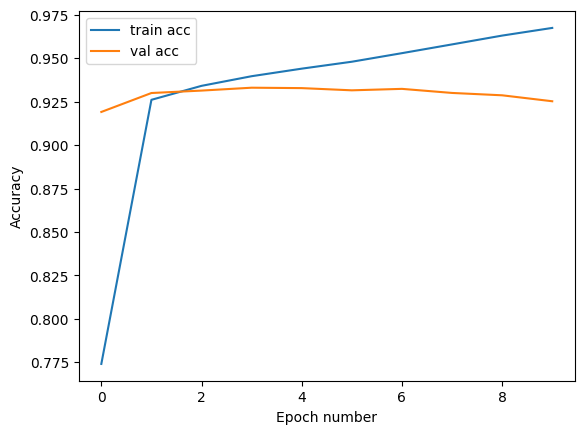

In [ ]:
plt.plot(lstm.history['accuracy'], label='train acc') # Plot training accuracy over epochs
plt.plot(lstm.history['val_accuracy'], label='val acc') # Plot validation accuracy over epochs
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Saving the model

In [ ]:
model.save('/content/drive/MyDrive/Depression Dataset/LSTM_Depression_Model')

# Loading the saved model to test users input


**Importing the librabies**

In [ ]:
import tensorflow
import numpy as np
import json
import tensorflow
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk
import re
import unidecode
import contractions
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Importing the saved model**

In [ ]:
model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Depression Dataset/LSTM.h5')

**Preprocessing**

In [ ]:
def padding(txt):
    with open('/content/drive/MyDrive/Depression Dataset/LSTM_tokenizer.json', 'r') as f:
        loaded_tokenizer_config = json.load(f)
    max_seq_length = 100
    loaded_tokenizer = Tokenizer(num_words=5000)
    loaded_tokenizer.word_index = loaded_tokenizer_config['word_index']

    loaded_X_train_sequences = loaded_tokenizer.texts_to_sequences([txt])



    loaded_X_train_padded = pad_sequences(loaded_X_train_sequences, maxlen=max_seq_length, padding='post', truncating='post')
    return loaded_X_train_padded

# Text Preprocessing


def preprocess(text):


    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    html_pattern = r'<.*?>'
    text = re.sub(pattern=html_pattern, repl=' ', string=text)

    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(pattern=url_pattern, repl=' ', string=text)

    # numbers
    number_pattern = r'\d+'
    text = re.sub(pattern=number_pattern, repl=' ', string=text)

    # unidecode
    text = unidecode.unidecode(text)

    # Expanding Contractions
    text = contractions.fix(text)

    # remove punctutation
    text = text.translate(str.maketrans('', '', punctuation))

    # removing single characters
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    text = re.sub(pattern=single_char_pattern, repl=" ", string=text)

    # Extra spaces
    space_pattern = r'\s+'
    text = re.sub(pattern=space_pattern, repl=" ", string=text)

    # Tokenize and remove stopwords
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    # Join the words back into a single string
    text = ' '.join(words)

    return text

In [ ]:
user_input = input("Enter text data: ")

# Preprocess the user input
preprocessed_input = preprocess(user_input)

input_padded=padding(preprocessed_input)
user_prediction = model.predict(input_padded)

# Display the prediction
if user_prediction < 0.5:
    print("Predicted class: Depressed")
    print(user_prediction)
else:
    print("Predicted class: Not Depressed")
    print(user_prediction)


Enter text data: I want to die 
1/1 [==============================] - 1s 1s/step
Predicted class: Depressed
[[0.12839039]]


**END**